<a href="https://colab.research.google.com/github/naikshrey2308/ML_Labs/blob/main/ML_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data  = pd.read_csv("drive/MyDrive/BuyComputer.csv")
data.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


The `User ID` field is of no use while making predictions. Therefore, we drop that field.

In [ ]:
data = data.drop(columns=["User ID"])

In [ ]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Visualizing the data helps to know about the structure of the data, thus making the data more comprehensible.

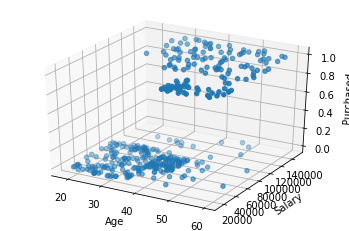

In [ ]:
ax = plt.axes(projection="3d")
ax.set_xlabel("Age")
ax.set_ylabel("Salary")
ax.set_zlabel("Purchased")
ax.scatter3D(data.Age, data.EstimatedSalary, data.Purchased)

### Preparing the dataset

In [ ]:
y = data.Purchased.values
X = data.drop(columns=["Purchased"]).values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=73)

### Using the `sklearn` model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=73)
model.fit(X_train, y_train)

LogisticRegression(random_state=73)

In [ ]:
predictions = model.predict(X_test)
predictions

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

array([[19,  0],
       [ 7, 14]])

In [ ]:
precision_score(y_test, predictions)

1.0

In [ ]:
accuracy_score(y_test, predictions)

0.825

In [ ]:
recall_score(y_test, predictions)

0.6666666666666666

In [ ]:
f1_score(y_test, predictions)

0.8

### Manual model training

In [ ]:
import tensorflow as tf
import random
import math

We know that there are 2 features. Therefore, our equation would be something like:

log(odds) = theta0 + theta1(x1) + theta2(x2)

In [ ]:
# Create the bias
bias = random.randint(-100, 100)
# Create the weights
weights = [random.randint(-100, 100) for i in X[0]]
params = [bias, *weights]
# print(params)
# gradient_descent_update(params, 0.5, predictions, y)
# print(params)
params

[72, 32, 37]

In [ ]:
def sigmoid(z):
    z = max(z, 1e-7)
    z = min(z, 1e+7)
    return (1 / (1 + math.exp(-1 * z)))

In [ ]:
def hypothesis(params, x1, x2):
    res = params[0] + x1*params[1] + x2*params[2]
    return (res)

In [ ]:
def predict(inputs, params):
    predictions = []
    for inp in inputs:
        res = sigmoid(hypothesis(params, inp[0], inp[1]))
        # if res >= 0.5:
        #     res = 1
        # else:
        #     res = 0
        predictions.append(res)
    return np.array(predictions)

In [ ]:
predictions = predict(X[:5], params)
predictions

array([0.50000002, 0.99994673, 0.9993394 , 1.        , 1.        ])

In [ ]:
def cost(predictions, y):
    cost = 0
    for i in range(len(predictions)):
        if y[i] == 1:
            cost += (-1 * np.log(predictions[i] + 1e-7))
        else:
            cost += (-1 * np.log(1 - predictions[i] + 1e-7))
    return (cost / len(predictions))

In [ ]:
cost(predictions, y[:500])

10.017236383692003

In [ ]:
def gradient_descent_update(params, alpha, predictions, targets, features):
    for w in range(len(params)):
        gradient = 0
        for i in range(len(predictions)):
            if w == 0:
                gradient += ((predictions[i] - targets[i]) * 1)
            else:
                gradient += ((predictions[i] - targets[i]) * features[i][w-1])
        gradient /= (2 * len(predictions))
        params[w] = params[w] - (alpha * gradient)
        # print(params)
    return params

In [ ]:
def train(features, labels, params, alpha, epochs):
    for i in range(epochs):
        res = predict(features, params)
        gradient_descent_update(params, alpha, res, labels, features)
        loss_values.append(cost(res, labels))
        # print(f"Loss ... {cost(res, labels)}, Params ... [{params}]")

In [ ]:
predictions = predict(X_test, params)
print(f"Before training: {cost(predictions, y_test)} ... params = {params}")

epochs = 5000
loss_values = []
epoch_values = [(i + 1) for i in range(epochs)]

train(X_train, y_train, params, 0.1, epochs)
predictions = predict(X_test, params)
print(f"After training: {cost(predictions, y_test)} ... params = {params}")

Before training: 6.727833084901914 ... params = [72, 32, 37]
After training: 0.4653084932774411 ... params = [-35.369418580305236, 71.94011349997228, 51.89526075796938]


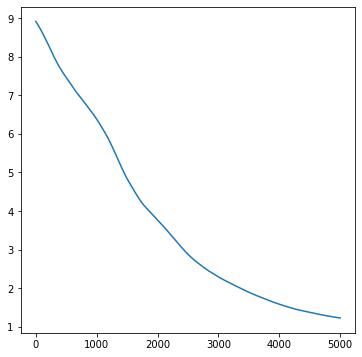

In [ ]:
# Plot the epochs vs loss curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(epoch_values, loss_values)
plt.show()

In [ ]:
def predict_outputs(predictions):
    res = []
    for i in predictions:
        if i >= 0.5:
            res.append(1)
        else:
            res.append(0)
    return res

In [ ]:
predictions = predict_outputs(predictions)

In [ ]:
precision_score(y_test, predictions)

0.525

In [ ]:
accuracy_score(y_test, predictions)

0.525

In [ ]:
recall_score(y_test, predictions)

1.0

In [ ]:
f1_score(y_test, predictions)

0.6885245901639345

In [ ]:
# Exercise Question (5)
predict([[28, 76000]], params)

array([1.])